Implement the fragmentation scheme in reverse to 'grow' some particles.

### Cozar Scheme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def fragmentation_event(L, k, fragmentation_mode):
    """
    L: lenght of cube
    k: size class. 0 if original
    fragmentation_mode: 1/2 if it breaks in two in a fragmentation event.
    """
    new_L = L*fragmentation_mode
    k += 1
    
    return new_L, k

In [3]:
def fix_mode(V, fragmentation_mode):
    """
    V: volume of sphere
    k: size class. 0 if original
    fragmentation_mode: 1/2 if it breaks in two in a fragmentation event.
    """
    new_V = V/fragmentation_mode
   
    return new_V

def random_mode(V):
    """
    V: volume of sphere
    k: size class. 0 if original
    fragmentation_mode: 1/2 if it breaks in two in a fragmentation event.
    """
    n = V.shape[0]
    fragmentation_mode = np.random.rand(n)
    print(fragmentation_mode)
    new_V = V/fragmentation_mode
    
    return new_V

In [4]:
def frag_vec(V, dt, fragmentation_timescale, mode):
    n = V.shape[0]
    frag_prob = math.exp(-dt/(fragmentation_timescale))
    
    frag_prob = np.ones(n)*frag_prob
    rnd_num = np.random.rand(n)
    
    truth = rnd_num  > frag_prob
    
    if mode == 'rand':
        fragmentation_mode = np.random.rand(n)*truth + ~truth
        V = V/fragmentation_mode
        
    elif mode == 'fix':
        fragmentation_mode = 1/2*truth + ~truth
        V = V/fragmentation_mode
        
    elif mode == '3D':
        fragmentation_mode = 1/8*truth + ~truth
        V = V/fragmentation_mode
        
    return V

In [5]:
def fragmentation(V, dt, fragmentation_timescale, mode):
    """
    mode: 'rand' or 'fix'.
    """
    n = V.shape[0]
    print(n)
    fragmentation_prob = math.exp(-dt/(fragmentation_timescale))
    rnd_num = np.random.rand(n)
    
    if rnd_num > fragmentation_prob and mode == 'rand':
        V = random_mode(V)
        
    elif rnd_num > fragmentation_prob and mode == 'fix':
        V = fix_mode(V, 1/2)

        
    return V

In [6]:
def logistic_map(x, r):
    x_1 = r*x*(1 - x)
    
    return x_1

# Settling velocity

In [7]:
def sinkingVelocity(radius, β, ν):
    alpha = radius
    g = 9.81
  
    tau_p = alpha*alpha/(3*β*ν)

    v_s = (1 - β)*g*tau_p
    
    return v_s

# Experiment 

In [10]:
r = 5e-8 # 100nm
k = 0
sim_time = 1000 #365*10
N = sim_time
V = 4/3 * np.pi*r**3
mode = 1/2
frag_timescale = 1000
frag_mode = 1/2
k = 0
particles = 10000
initial_depth = 5000

time = np.linspace(0, sim_time, N)
dt = time[1] - time[0]

radiuses_rand = np.zeros((particles, N))
volumes_rand = np.zeros((particles, N))

radiuses_fix = np.zeros((particles, N))
volumes_fix = np.zeros((particles, N))

length_3d = np.zeros((particles, N))
volumes_3d = np.zeros((particles, N))

radiuses_rand[:, 0] = r
volumes_rand[:, 0] = V

radiuses_fix[:, 0] = r
volumes_fix[:, 0] = V

length_3d[:, 0] = r/2
volumes_3d[:, 0] = (r/2)**3

for i in range(N-1):
    vr = volumes_rand[:, i]
    vf = volumes_fix[:, i]
    volumes_rand[:, i+1] = frag_vec(vr , dt, frag_timescale, 'rand')
    volumes_fix[:, i+1] = frag_vec(vf, dt, frag_timescale, 'fix')
    
    radiuses_rand[:, i+1] = np.cbrt(3*volumes_rand[:, i+1]/(4*np.pi))
    radiuses_fix[:, i+1] = np.cbrt(3*volumes_fix[:, i+1]/(4*np.pi))
    
    l = length_3d[:, i]
    length_3d[:, i+1] = frag_vec(l, dt, frag_timescale, '3D')
    volumes_3d[:, i+1] = length_3d[:, i+1]**3

In [11]:
mean_rand = np.mean(radiuses_rand, axis=0)
mean_vol_rand = np.mean(volumes_rand, axis=0)

mean_fix = np.mean(radiuses_fix, axis=0)
mean_vol_fix = np.mean(volumes_fix, axis=0)

mean_3D = np.mean(length_3d, axis=0)
mean_vol_3D = np.mean(volumes_3d, axis=0)


[]

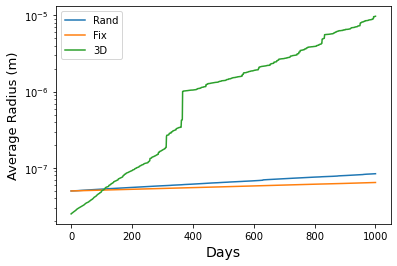

In [12]:
plt.plot(time, mean_rand, label=r'Rand')
# plt.fill_between(time, mean_rand + std_rand, mean_rand, alpha=0.2, color='b')
# plt.fill_between(time, mean_rand , mean_rand - std_rand, alpha=0.2, color='b')

plt.plot(time, mean_fix, label=r'Fix')
# plt.fill_between(time, mean_fix + std_fix, mean_fix, alpha=0.2, color='orange')
# plt.fill_between(time, mean_fix , mean_fix - std_fix, alpha=0.2, color='orange')

plt.plot(time, mean_3D, label='3D')

plt.xlabel('Days', fontsize=14)
plt.ylabel('Average Radius (m)', fontsize=13)
plt.legend(loc='upper left')
plt.semilogy()

[]

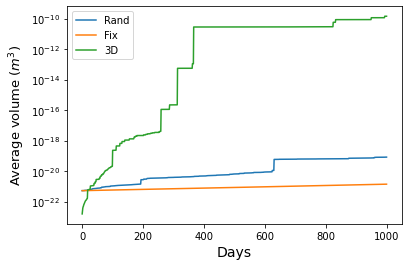

In [13]:
plt.plot(time, mean_vol_rand, label=r'Rand')
# plt.fill_between(time, mean_rand + std_rand, mean_rand, alpha=0.2, color='b')
# plt.fill_between(time, mean_rand , mean_rand - std_rand, alpha=0.2, color='b')

plt.plot(time, mean_vol_fix, label=r'Fix')
# plt.fill_between(time, mean_fix + std_fix, mean_fix, alpha=0.2, color='orange')
# plt.fill_between(time, mean_fix , mean_fix - std_fix, alpha=0.2, color='orange')

plt.plot(time, mean_vol_3D, label='3D')

plt.xlabel('Days', fontsize=14)
plt.ylabel(r'Average volume ($m^3$)', fontsize=13)
plt.legend(loc='upper left')
plt.semilogy()

Text(0.5, 1.0, 'Fragmentation timescale = 100 ')

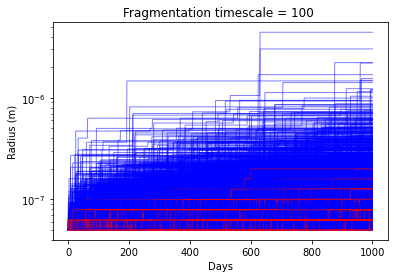

In [14]:
for p in range(particles):
    plt.semilogy(time, radiuses_rand[p], c='b', label='rand', lw='1', alpha=0.5)
    plt.semilogy(time, radiuses_fix[p], c='r', label='fix', lw='1', alpha=0.5)
    
plt.xlabel('Days')
plt.ylabel('Radius (m)')
plt.title('Fragmentation timescale = 100 ')
# plt.legend()

[]

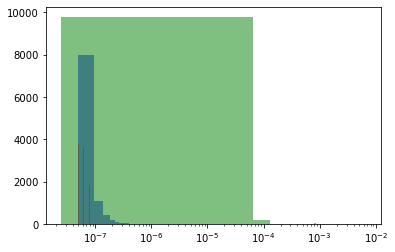

In [15]:
plt.hist(radiuses_rand[:, -1], bins=100, color='b', alpha=0.5);
plt.hist(radiuses_fix[:, -1], bins=100, color='r', alpha=0.5);
plt.hist(length_3d[:, -1], bins=100, color='g', alpha=0.5);
plt.semilogx()

# Average time it take the particle to reach the surface

In [16]:
length_3d

array([[2.5e-08, 2.5e-08, 2.5e-08, ..., 1.6e-06, 1.6e-06, 1.6e-06],
       [2.5e-08, 2.5e-08, 2.5e-08, ..., 2.5e-08, 2.5e-08, 2.5e-08],
       [2.5e-08, 2.5e-08, 2.5e-08, ..., 2.0e-07, 2.0e-07, 2.0e-07],
       ...,
       [2.5e-08, 2.5e-08, 2.5e-08, ..., 2.0e-07, 2.0e-07, 2.0e-07],
       [2.5e-08, 2.5e-08, 2.5e-08, ..., 1.6e-06, 1.6e-06, 1.6e-06],
       [2.5e-08, 2.5e-08, 2.5e-08, ..., 2.0e-07, 2.0e-07, 2.0e-07]])

In [17]:
sinkingVelocity(length_3d, 0.8, 1e-6)

array([[5.109375e-10, 5.109375e-10, 5.109375e-10, ..., 2.092800e-06,
        2.092800e-06, 2.092800e-06],
       [5.109375e-10, 5.109375e-10, 5.109375e-10, ..., 5.109375e-10,
        5.109375e-10, 5.109375e-10],
       [5.109375e-10, 5.109375e-10, 5.109375e-10, ..., 3.270000e-08,
        3.270000e-08, 3.270000e-08],
       ...,
       [5.109375e-10, 5.109375e-10, 5.109375e-10, ..., 3.270000e-08,
        3.270000e-08, 3.270000e-08],
       [5.109375e-10, 5.109375e-10, 5.109375e-10, ..., 2.092800e-06,
        2.092800e-06, 2.092800e-06],
       [5.109375e-10, 5.109375e-10, 5.109375e-10, ..., 3.270000e-08,
        3.270000e-08, 3.270000e-08]])

# Sensibility to dt

In [140]:
DTs = np.logspace(1e-5, 10, 10001)

In [141]:
frag_timescale = 1000

In [142]:
frag_probas  = np.exp(-DTs/(frag_timescale))

Text(0, 0.5, 'Fragmentation Probability')

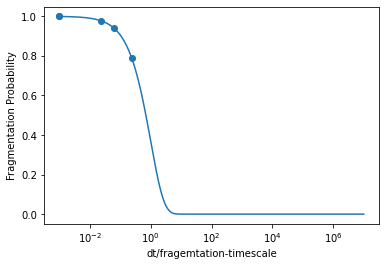

In [152]:
plt.semilogx(DTs/frag_timescale, frag_probas)
plt.scatter(dT/frag_timescale, frag_probas_scat)
plt.xlabel('dt/fragemtation-timescale')
plt.ylabel('Fragmentation Probability')

In [147]:
dT = np.array([1,60, 1, 24, 240])
frag_probas_scat  = np.exp(-dT/(frag_timescale))

In [148]:
dT

array([  1,  60,   1,  24, 240])